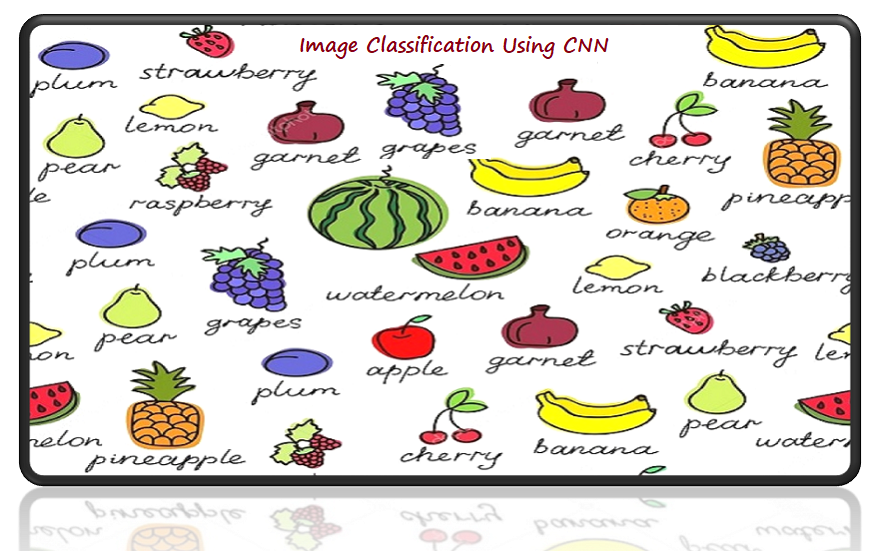

<center><h1 style = "background:#0C0C0C ;color:white;border:0;font-family:Bahnschrift SemiBold;font-weight:bold">Introduction  </h1></center>
<p style = "color:black;font-family:Bahnschrift SemiBold;font-weight:bold;font-size:16px"> Data consists of many fruits.Total number of images: 90483.Training set size: 67692 images (one fruit or vegetable per image).Test set size: 22688 images (one fruit or vegetable per image).Number of classes: 131 (fruits and vegetables).Image size: 100x100 pixels.Different varieties of the same fruit (apple for instance) are stored as belonging to different classes.</p>

<p style = "color:darkred;font-family:Bahnschrift SemiBold;font-weight:bold;font-size:16px" > What are we going to do in this notebook? </p>

<p style = "color:black;font-family:Bahnschrift SemiBold;font-weight:bold;font-size:16px">We will first examine the fruits. we will look at it as pictures and numbers of pictures. Next, we will create our CNN model.Then we will evaluate the results of the model we created and examine them on the graph. </p>

<p style = "color:darkred;font-family:Bahnschrift SemiBold;font-weight:bold;font-size:16px" > So, let's get started. </p>
    
<h2 style = "background:#0C0C0C ;color:white;border:0;font-family:Bahnschrift SemiBold;font-weight:bold">Content :</h2>

<ul>
    <li style = "color:gray;font-size:16px"> <a href = "#1" style = "color:black;font-family:Bahnschrift SemiBold;font-weight:bold"> Load and Check Data </a> </li> 
         <li style = "color:gray;font-size:16px" ><a href = "#2" style = "color:black;font-family:Bahnschrift SemiBold;font-weight:bold"> Modeling </a>
       <ul>
            <li style = "color:black;font-size:16px" ><a href = "#3" style = "color:darkred;font-family:Bahnschrift SemiBold;font-weight:bold"> Create Model </a></li>      
           <li style = "color:black;font-size:16px" ><a href = "#4" style = "color:darkred;font-family:Bahnschrift SemiBold;font-weight:bold"> Compile Model </a></li>
           <li style = "color:black;font-size:16px" ><a href = "#5" style = "color:darkred;font-family:Bahnschrift SemiBold;font-weight:bold"> Epochs and Batch Size </a></li>
           <li style = "color:black;font-size:16px" ><a href = "#6" style = "color:darkred;font-family:Bahnschrift SemiBold;font-weight:bold"> Data Augmentation </a></li>
                      <li style = "color:black;font-size:16px" ><a href = "#7" style = "color:darkred;font-family:Bahnschrift SemiBold;font-weight:bold"> Fit the Model </a></li>
                      <li style = "color:black;font-size:16px" ><a href = "#8" style = "color:darkred;font-family:Bahnschrift SemiBold;font-weight:bold"> Evaluate the model </a>
           <ul>
                                       <li style = "color:grey;font-size:16px" ><a href = "#9" style = "color:#321414;font-family:Bahnschrift SemiBold;font-weight:bold"> Loss Chart </a></li>
                                       <li style = "color:grey;font-size:16px" ><a href = "#10" style = "color:#321414;font-family:Bahnschrift SemiBold;font-weight:bold"> Accuracy Chart </a></li>
                    </ul>                      
           </li>
                                 <li style = "color:black;font-size:16px" ><a href = "#11" style = "color:darkred;font-family:Bahnschrift SemiBold;font-weight:bold"> CONCLUSION </a></li>
       </ul>
    </li>
</ul>

<h2 style = "background-image:url('https://t1.pixers.pics/img-1fb6f67c/posterler-sari-meyveler-desen.jpg?H4sIAAAAAAAAA3VOW46DMAy8TpAAG0xi4AD97REQj9DNlkeUpLvVnn4TVf2s7JHtke0ZeBx-XDXM-gjawW6WZdOwmi1Ovnfamz8tpKxzzPrIbgIxduePdrM7rSgk5QkKOSHrf8d4uI_uLr5CsL4H8FRa84zfYpk9zLuHGisGZJCdopY6wkXxMtiteC0GM98LhU-JpT1uOabI3l4axLxJHoIzu4imzigXxLe9ZfBB8tVDvILLFagDblNKlajhcqWOW26lGpaVxknh1GhmqoiRkNdubLWeqqZe6zKq_ANn9tv0MQEAAA==');background-position: center;text-shadow: 12px 10px 4px #333;color:black;border:0;font-family:Palatino Linotype;font-weight:bold;font-size:25px;text-indent:10px">Import Library</h2>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
import cv2

# import model 
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

#import warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id = "1" ></a>
<h2 style = "background-image:url('https://t1.pixers.pics/img-1fb6f67c/posterler-sari-meyveler-desen.jpg?H4sIAAAAAAAAA3VOW46DMAy8TpAAG0xi4AD97REQj9DNlkeUpLvVnn4TVf2s7JHtke0ZeBx-XDXM-gjawW6WZdOwmi1Ovnfamz8tpKxzzPrIbgIxduePdrM7rSgk5QkKOSHrf8d4uI_uLr5CsL4H8FRa84zfYpk9zLuHGisGZJCdopY6wkXxMtiteC0GM98LhU-JpT1uOabI3l4axLxJHoIzu4imzigXxLe9ZfBB8tVDvILLFagDblNKlajhcqWOW26lGpaVxknh1GhmqoiRkNdubLWeqqZe6zKq_ANn9tv0MQEAAA==');background-position: center;text-shadow: 12px 10px 4px #333;color:black;border:0;font-family:Palatino Linotype;font-weight:bold;font-size:25px;text-indent:10px">Load and Check Data</h2>

<ul>
    <li style = 'color:darkred'> <p style = 'font-weight:bold;color:black'> 🍎 File paths containing your test and training data </p> </li>
</ul>

In [ ]:
train_dir = '/kaggle/input/fruits/fruits-360/Training/'
test_dir =  '/kaggle/input/fruits/fruits-360/Test/'

<ul>
    <li style = 'color:red'> <p style = 'font-weight:bold;color:black'> 🍓 We make fruits more legible so that we can examine them better </p> </li>
</ul>

In [ ]:
fruits = []
fruits_image = []
for i in os.listdir(train_dir):
    for image_filename in os.listdir(train_dir + i):
        fruits.append(i) # name of the fruit 
        fruits_image.append(i + '/' + image_filename) # image of the fruit

In [ ]:
train_fruits = pd.DataFrame(fruits, columns=["Fruits"])
train_fruits["Fruits Image"] = fruits_image

In [ ]:
train_fruits

<ul>
    <li style = 'color:yellow'> <p style = 'font-weight:bold;color:black'> 🍍 Let's take a look at the 15 most common fruits among these fruits. </p> </li>
</ul>

In [ ]:
from collections import Counter
newData = Counter(train_fruits["Fruits"])
most_fruits = newData.most_common(15)

print("The 15 most frequently found fruits in the data set and their number")
most_fruits

In [ ]:
x,y = zip(*most_fruits)
x,y = list(x),list(y)

In [ ]:
print("The 15 most frequently found fruits in the dataset -- > \n ", x)

<ul>
    <li style = 'color:purple'> <p style = 'font-weight:bold;color:black'> 🍇 Let's see better by visualizing the top 15 most common fruits you found above. </p> </li>
</ul>

In [ ]:
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y, palette=sns.color_palette("BuGn_r", 15)) 
plt.xlabel('Fruits', size = 20) 
plt.ylabel('Number of Fruits', size = 20 )
plt.xticks(rotation = 75)
plt.title('The 15 most frequently found fruits in the data set and their number') 
plt.show()

<ul>
    <li style = 'color:green'> <p style = 'font-weight:bold;color:black'> 🥑  Let's take a look at the pictures of these fruits. </p> </li>
</ul>

In [ ]:
plt.figure(figsize=(25,16))
how_many_fruits = len(x)

for i in range(how_many_fruits):
    fruits = train_fruits[train_fruits["Fruits"] == x[i]]["Fruits Image"].values [1]
    
    plt.subplot(3,5,i+1)
    img = load_img(train_dir + fruits)
    plt.imshow(img)
    plt.title(x[i].upper(), color = "green", fontsize = 15 , fontweight = 600)
    plt.axis("off")

plt.suptitle("The 15 Most Abundant Fruits", fontsize = 25 , color = "darkred", fontweight = 'bold')
plt.show()

In [ ]:
img = load_img(train_dir + "Cantaloupe 1/r_234_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

<ul>
    <li style = 'color:red'> <p style = 'font-weight:bold;color:black'> 🍉  Let's look at the shape of the pictures we have. </p> </li>
    <li style = 'color:yellow'> <p style = 'font-weight:bold;color:black'> 🍐  this is important to us because this will be the input value of our model. </p> </li>
</ul>

In [ ]:
array_image = img_to_array(img)
print("Image Shape --> ", array_image.shape)

<ul>
    <li style = 'color:gray'> <p style = 'font-weight:bold;color:black'> 🍈  And before moving on to our model, let's take a look at how many different fruits we have. </p> </li>
    <li style = 'color:orange'> <p style = 'font-weight:bold;color:black'> 🍊  this is also important to us, because this will be the output value of our model. </p> </li>
</ul>

In [ ]:
fruitCountUnique = glob(train_dir + '/*' )
numberOfClass = len(fruitCountUnique)
print("How many different fruits are there  -->  ",numberOfClass)

<a id = "2" ></a>
<h2 style = "background-image:url('https://t1.pixers.pics/img-1fb6f67c/posterler-sari-meyveler-desen.jpg?H4sIAAAAAAAAA3VOW46DMAy8TpAAG0xi4AD97REQj9DNlkeUpLvVnn4TVf2s7JHtke0ZeBx-XDXM-gjawW6WZdOwmi1Ovnfamz8tpKxzzPrIbgIxduePdrM7rSgk5QkKOSHrf8d4uI_uLr5CsL4H8FRa84zfYpk9zLuHGisGZJCdopY6wkXxMtiteC0GM98LhU-JpT1uOabI3l4axLxJHoIzu4imzigXxLe9ZfBB8tVDvILLFagDblNKlajhcqWOW26lGpaVxknh1GhmqoiRkNdubLWeqqZe6zKq_ANn9tv0MQEAAA==');background-position: center;text-shadow: 12px 10px 4px #333;color:black;border:0;font-family:Palatino Linotype;font-weight:bold;font-size:25px;text-indent:10px">Modeling </h2>

<a id = "3" ></a>
<ul>
    <li style = 'color:purple;font-size:16px'> <p style = 'font-weight:bold'> 🍇 Create Model </p> </li>
</ul>

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = array_image.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))

<a id = "4" ></a>
<ul>
    <li style = 'color:darkred;font-size:16px'> <p style = 'font-weight:bold'> 🍒 Compile Model </p> </li>
</ul>

In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

<a id = "5" ></a>
<ul>
    <li style = 'color:green;font-size:16px'> <p style = 'font-weight:bold'> 🍐 Epochs and Batch Size  </p> </li>
</ul>

In [ ]:
epochs = 100  
batch_size = 32

<a id = "6" ></a>
<ul>
    <li style = 'color:red;font-size:16px'> <p style = 'font-weight:bold'> 🍅 Data Augmentation  </p> </li>
</ul> 

In [ ]:
print("Target Size --> ", array_image.shape[:2])

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size= array_image.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size= array_image.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

In [ ]:
for data_batch, labels_batch in train_generator:
    print("data_batch shape --> ",data_batch.shape)
    print("labels_batch shape --> ",labels_batch.shape)
    break

<a id = "7" ></a>
<ul>
    <li style = 'color:yellow;font-size:16px'> <p style = 'font-weight:bold'> 🍏 Fit the model  </p> </li>
</ul> 

In [ ]:
hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 1600 // batch_size,
        epochs=epochs,
        validation_data = test_generator,
        validation_steps = 800 // batch_size)

<a id = "8" ></a>
<h2 style = "background-image:url('https://t1.pixers.pics/img-1fb6f67c/posterler-sari-meyveler-desen.jpg?H4sIAAAAAAAAA3VOW46DMAy8TpAAG0xi4AD97REQj9DNlkeUpLvVnn4TVf2s7JHtke0ZeBx-XDXM-gjawW6WZdOwmi1Ovnfamz8tpKxzzPrIbgIxduePdrM7rSgk5QkKOSHrf8d4uI_uLr5CsL4H8FRa84zfYpk9zLuHGisGZJCdopY6wkXxMtiteC0GM98LhU-JpT1uOabI3l4axLxJHoIzu4imzigXxLe9ZfBB8tVDvILLFagDblNKlajhcqWOW26lGpaVxknh1GhmqoiRkNdubLWeqqZe6zKq_ANn9tv0MQEAAA==');background-position: center;text-shadow: 12px 10px 4px #333;color:black;border:0;font-family:Palatino Linotype;font-weight:bold;font-size:25px;text-indent:10px">Evaluate the model</h2>

In [ ]:
hist.history.keys()

<a id = "9" ></a>
<ul>
    <li style = 'color:brown;font-size:16px'> <p style = 'font-weight:bold'> 🌰 Loss Chart  </p> </li>
</ul> 

In [ ]:
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

<a id = "10" ></a>
<ul>
    <li style = 'color:gray;font-size:16px'> <p style = 'font-weight:bold'> 🍈 Accuracy Chart  </p> </li>
</ul> 

In [ ]:
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

<a id ='11' ></a>
<h4 style = "background:#0C0C0C ;color:white;border:0;font-family:Bahnschrift SemiBold;font-weight:bold"> CONCLUSION</h4>

<p style = "color:darkred;font-family:Bahnschrift SemiBold;font-weight:bold" > I am waiting for them if you have any questions or suggestions. </p>

<p style = "color:black;font-family:Bahnschrift SemiBold;font-weight:bold" >  Seaborn Tutorial -->  
    <a href = "https://www.kaggle.com/rafetcan/visualization-tutorial-with-seaborn" >https://www.kaggle.com/rafetcan/visualization-tutorial-with-seaborn</a>
</p>
<p style = "color:black;font-family:Bahnschrift SemiBold;font-weight:bold" >  Plotly Tutorial -->  
    <a href = "https://www.kaggle.com/rafetcan/plotly-tutorial-for-beginners" >https://www.kaggle.com/rafetcan/plotly-tutorial-for-beginners</a>
    </p>
<p style = "color:black;font-family:Bahnschrift SemiBold;font-weight:bold" >      Convolutional Neural Network (CNN) Tutorial -->  
    <a href = "https://www.kaggle.com/rafetcan/convolutional-neural-network-cnn-tutorial" >https://www.kaggle.com/rafetcan/convolutional-neural-network-cnn-tutorial</a>
</p>